In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
x_coordinates=[]
y_coordinates=[]
states=[]
days_of_virus_in_body=[]
for i in range(20):
  for j in range(20):
    x_coordinates.append(2*i) #Assume that app people live at equal space from each other
    y_coordinates.append(2*j) 
    states.append(0) #Initially person is not infected, so state=0
    days_of_virus_in_body.append(0)
print(x_coordinates)
print(y_coordinates)
print(days_of_virus_in_body)
print(states)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,

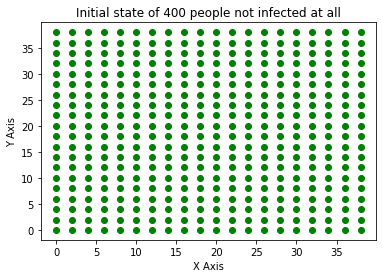

In [0]:
plt.scatter(x_coordinates,y_coordinates,color='g')
plt.title('Initial state of 400 people not infected at all')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

In [0]:
x_entry_points=[0,40,20,20]
y_entry_points=[20,20,0,40]
time=[]
for i in range(50):
  time.append(i)
print(time)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


When infected individuals are not quarantined.

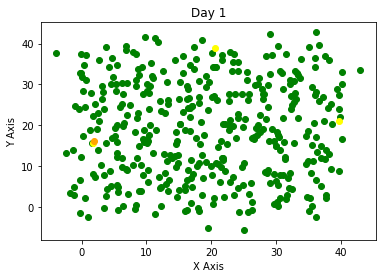

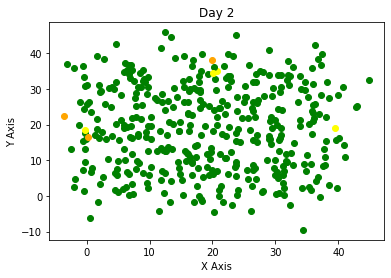

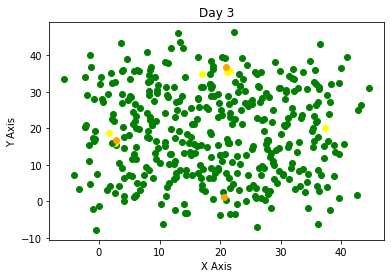

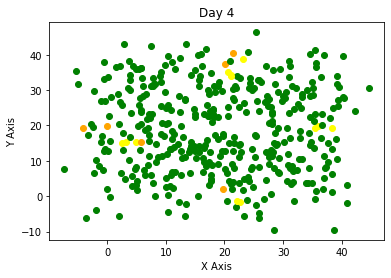

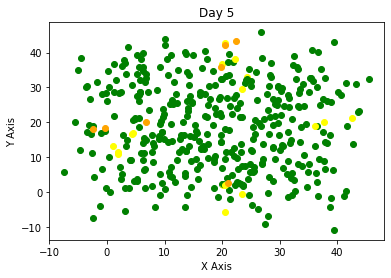

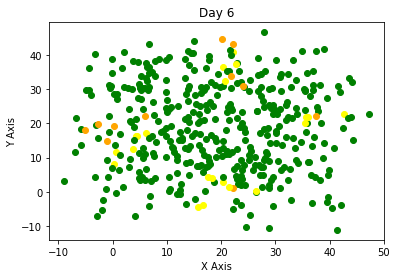

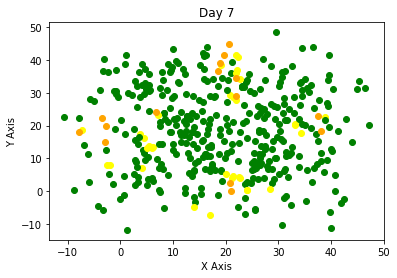

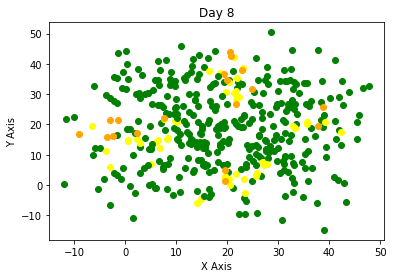

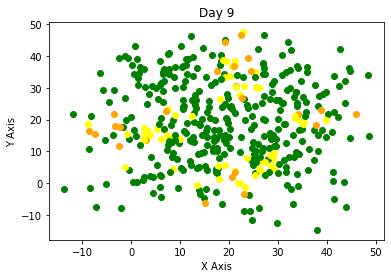

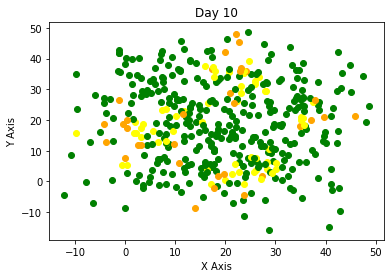

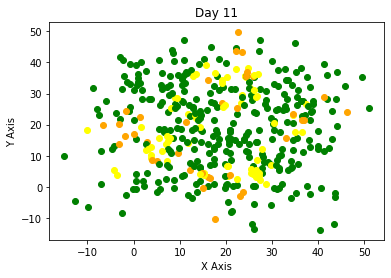

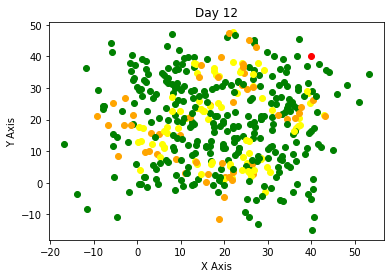

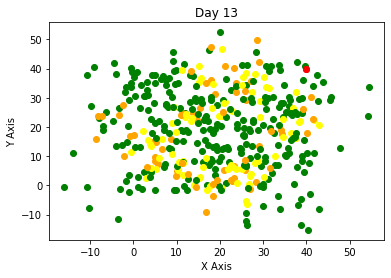

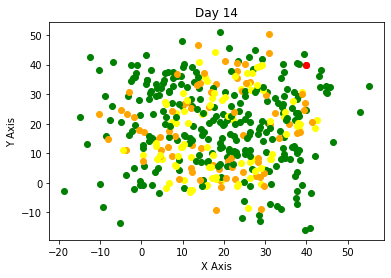

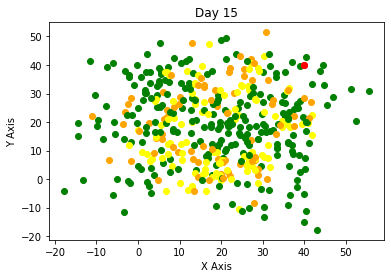

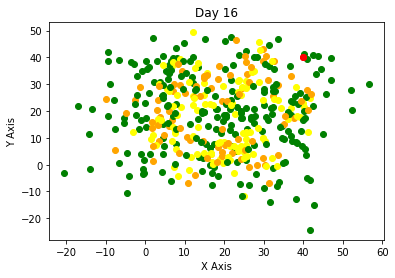

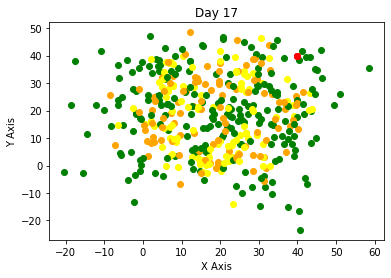

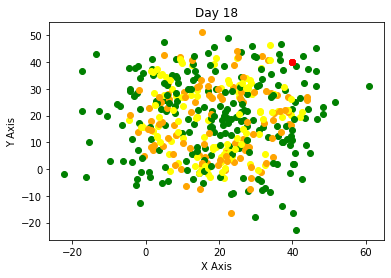

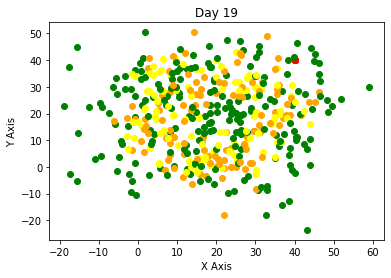

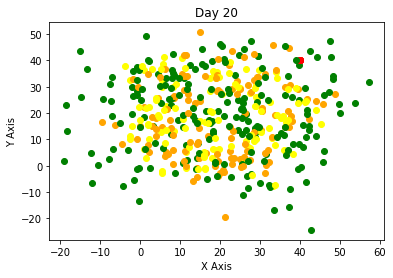

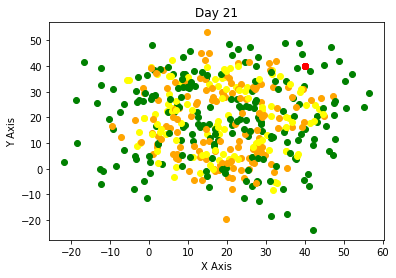

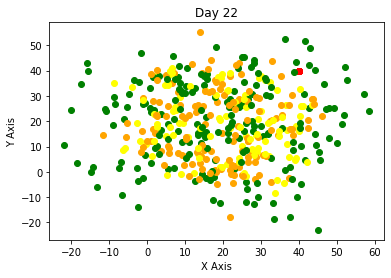

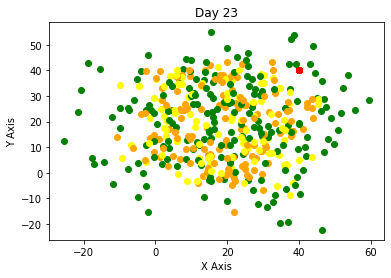

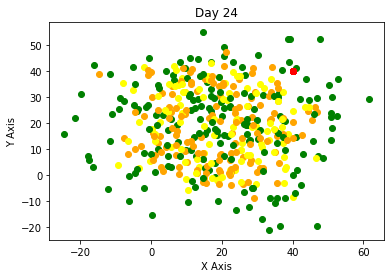

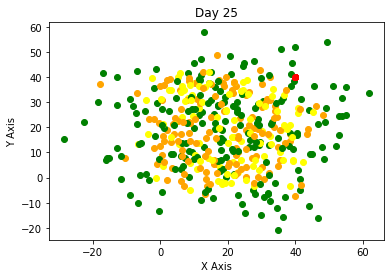

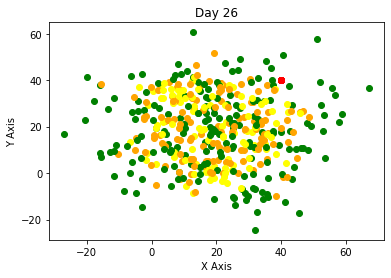

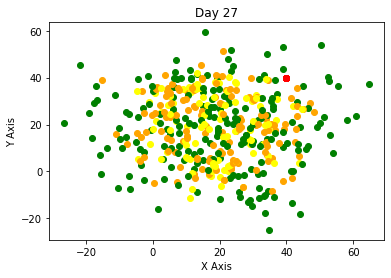

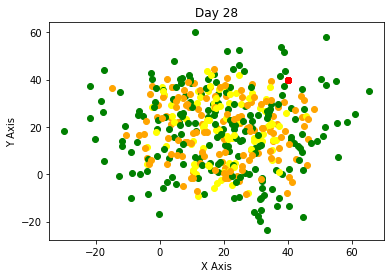

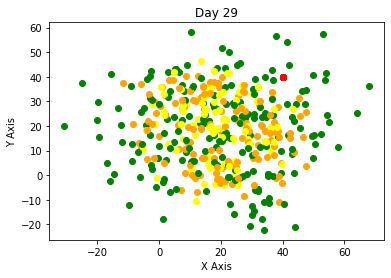

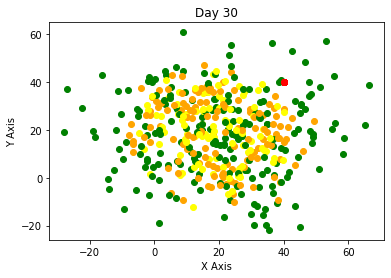

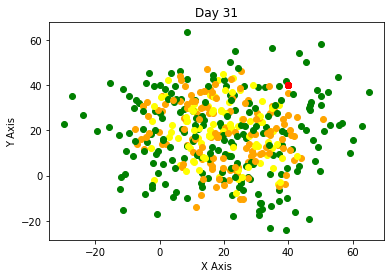

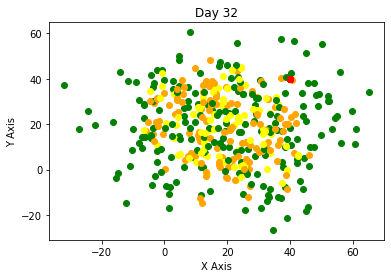

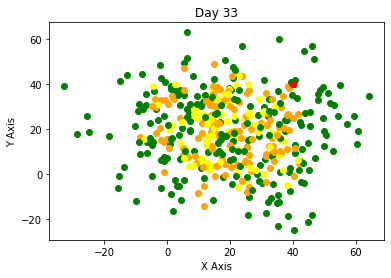

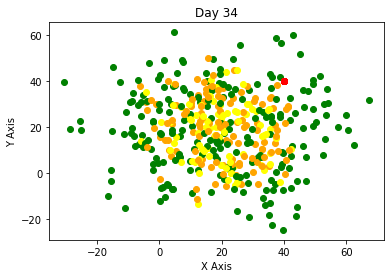

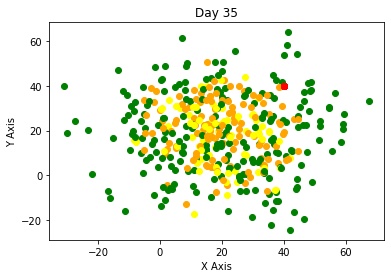

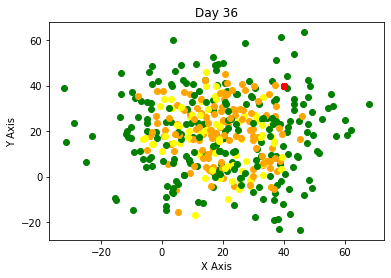

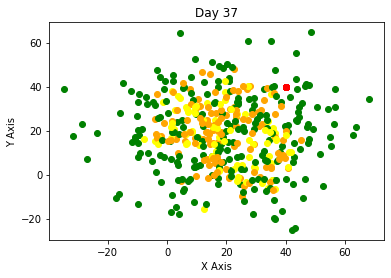

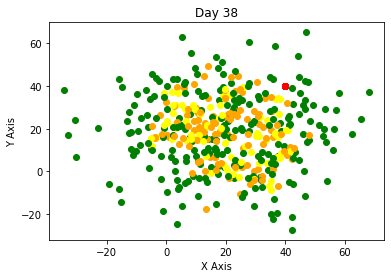

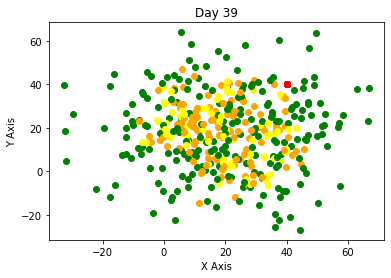

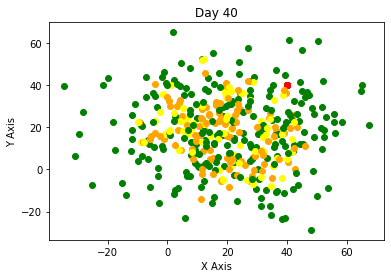

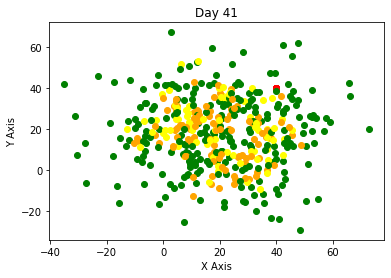

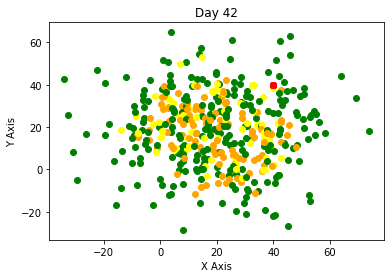

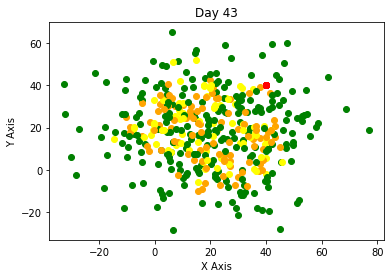

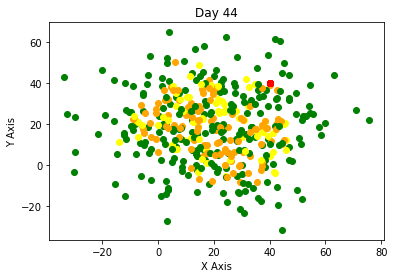

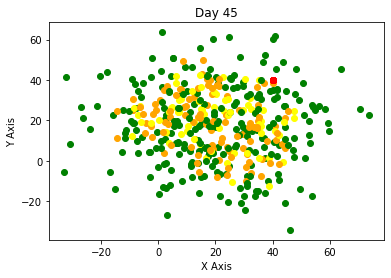

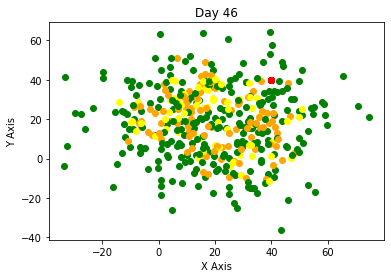

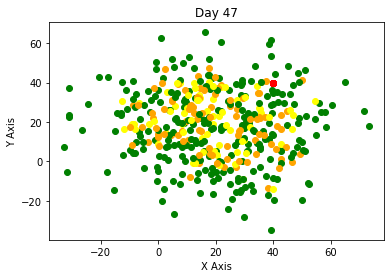

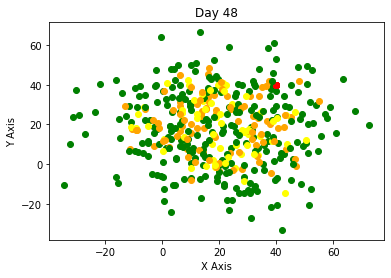

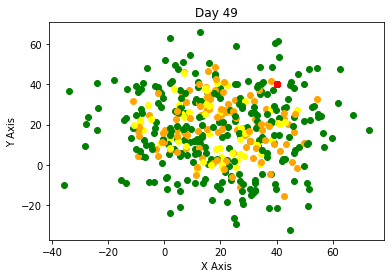

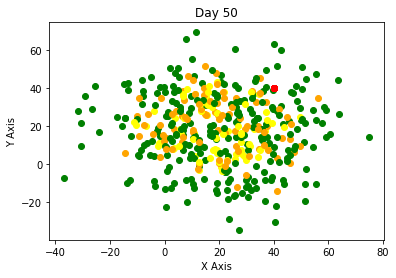

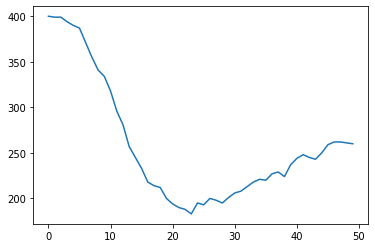

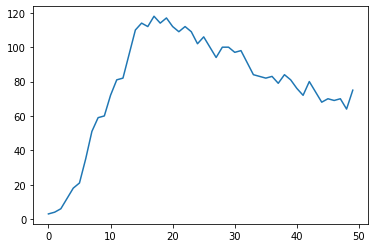

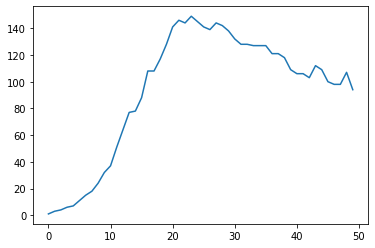

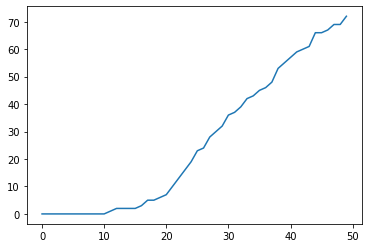

In [0]:
num_healthy=[]
num_with_virus=[]
num_infected=[]
num_dead=[]

for i in range(50):
  arrival=np.random.uniform(0,1)
  for j in range(len(x_entry_points)):

    if(arrival<0.9): #For any second, the probability of arrival is 0.9 from any point of entry
      x_coordinates.append(x_entry_points[j])
      y_coordinates.append(y_entry_points[j])
      days_of_virus_in_body.append(0)
      infected=np.random.uniform(0,1)

      if(infected<0.4): #Probability of on outsider being sick 
        states.append(2)
      elif(infected>=0.4 and infected<0.7): #Probability of an outsider having virus 
        states.append(1)
      else:
        states.append(0)

      #Find people who can leave since they are close to entry points, distance should be less than 1 meter from enrty point, probability of leaving is 0.2
      for k in range(len(x_coordinates)):
        if(x_entry_points[j]-x_coordinates[k])**2+(y_entry_points[j]-y_coordinates[k])**2 < 1:
          leaving=np.random.uniform(0,1)
          if(leaving<0.2):
            x_coordinates.pop(k)
            y_coordinates.pop(k)
            days_of_virus_in_body.pop(k)
            states.pop(k)
            break

  for j in range(len(x_coordinates)): #Distance travelled by person in one second follows a normal distribution
    if(states[j]!=3): #If the person is not dead, he or she will move around and an infected person will be in isolation
      x_coordinates[j]=x_coordinates[j]+np.random.normal(0,2)
      y_coordinates[j]=y_coordinates[j]+np.random.normal(0,2)

  for j in range(len(x_coordinates)): #Check all distances between people to infect healthy people who have virus or who are already infected
    for k in range(j):
      if(x_coordinates[j]-x_coordinates[k])**2+(y_coordinates[j]-y_coordinates[k])**2 < 1:
        catching=np.random.uniform(0,1)
        if(catching<0.5): #If distance is less than 1 meter, probability of catching virus is 0.5
          if((states[j]==1 or states[j]==2) and states[k]==0):
            states[k]=1 #State 1: Virus caught but not infected
          if((states[k]==1 or states[k]==2) and states[j]==0):
            states[j]=1

  for j in range(len(x_coordinates)):
    if(states[j]==1 or states[j]==2):
      days_of_virus_in_body[j]=days_of_virus_in_body[j]+1
    if(days_of_virus_in_body[j]==6):
      states[j]=2 #State 2: Infection starts
    if(days_of_virus_in_body[j]>=12 and states[j]==2):
      live=np.random.uniform(0,1)
      if(live<0.1):
        states[j]=3 #State 3: person is dead, death rate is 0.
        x_coordinates[j]=40
        y_coordinates[j]=40
      else:
        states[j]=0
        days_of_virus_in_body[j]=0
    
  healthy=0
  with_virus=0
  infected=0
  dead=0
  for j in range(len(x_coordinates)):
    if(states[j]==0):
      healthy=healthy+1
    if(states[j]==1):
      with_virus=with_virus+1
    if(states[j]==2):
      infected=infected+1
    if(states[j]==3):
      dead=dead+1

  num_healthy.append(healthy)
  num_with_virus.append(with_virus)
  num_infected.append(infected)
  num_dead.append(dead)

  for j in range(len(x_coordinates)):
    if(states[j]==0):
      plt.scatter(x_coordinates[j],y_coordinates[j],color='green')
    if(states[j]==1):
      plt.scatter(x_coordinates[j],y_coordinates[j],color='yellow')
    if(states[j]==2):
      plt.scatter(x_coordinates[j],y_coordinates[j],color='orange')
    if(states[j]==3):
      plt.scatter(x_coordinates[j],y_coordinates[j],color='red')
  plt.title('Day '+str(i+1))
  plt.xlabel('X Axis')
  plt.ylabel('Y Axis')
  plt.show()
  
plt.plot(time,num_healthy)
plt.show()
plt.plot(time,num_with_virus)
plt.show()
plt.plot(time,num_infected)
plt.show()
plt.plot(time,num_dead)
plt.show()  
  #Green:healthy
  #Yellow:virus caught
  #Orange:Infected
  #Red:Dead



When infected individuals are quarantined.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,

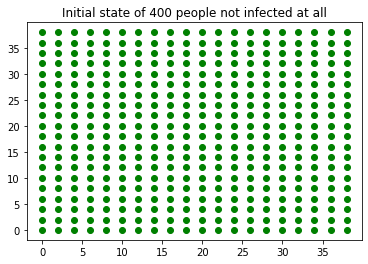

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


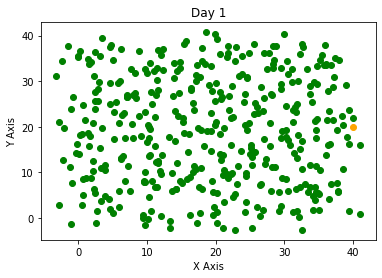

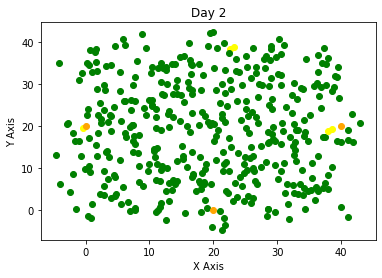

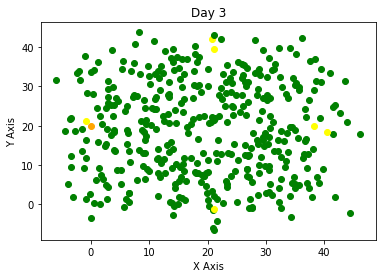

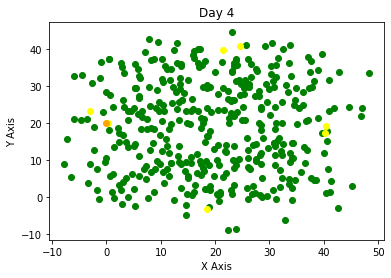

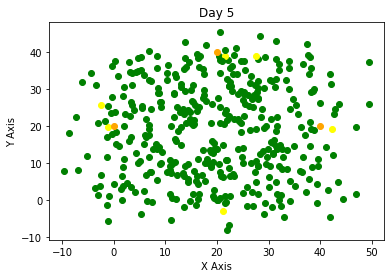

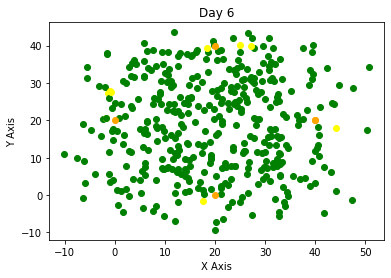

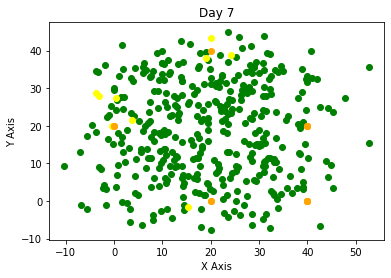

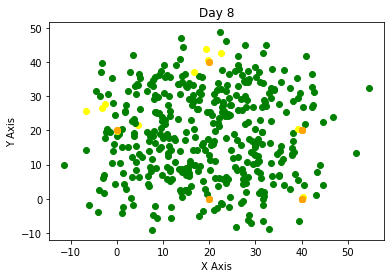

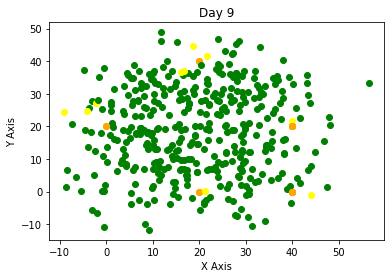

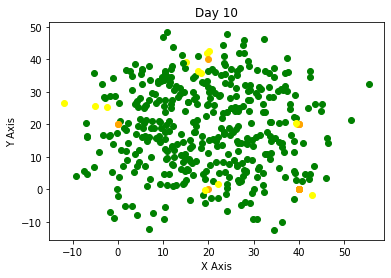

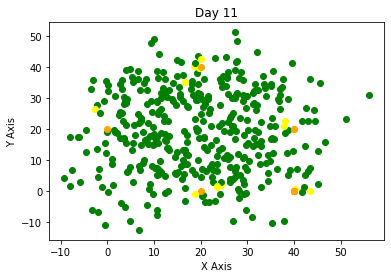

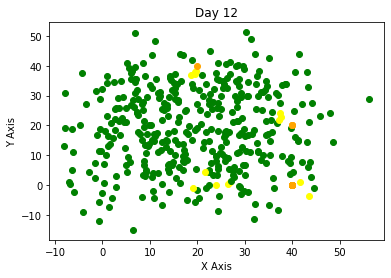

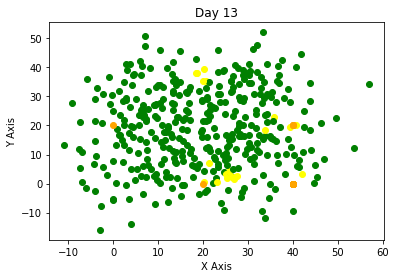

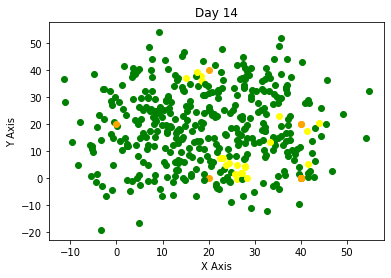

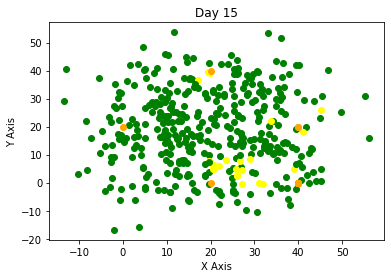

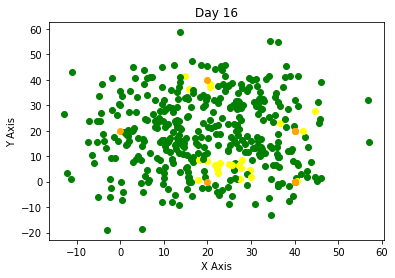

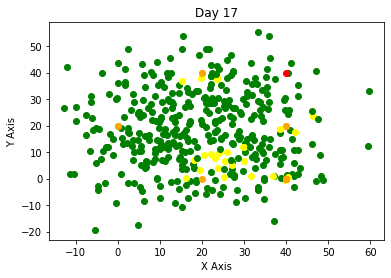

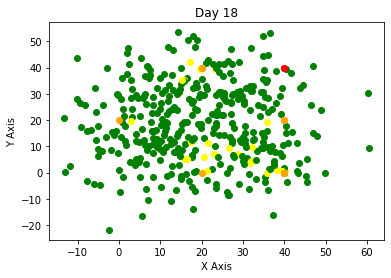

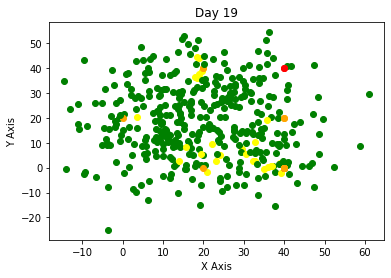

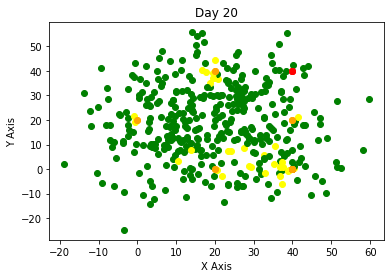

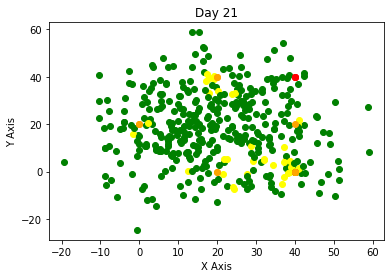

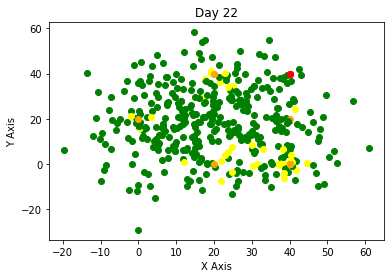

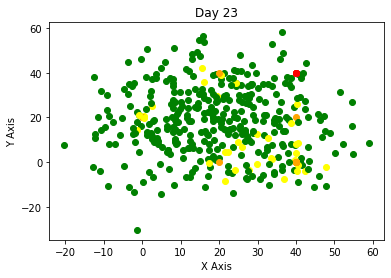

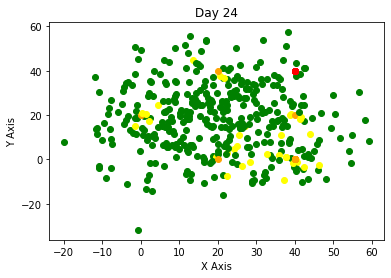

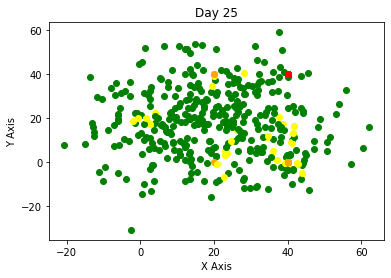

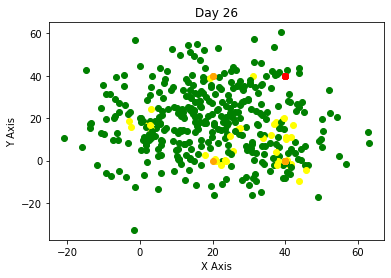

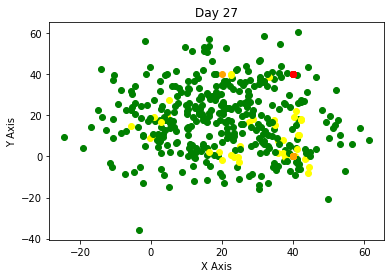

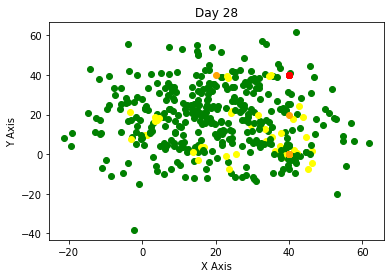

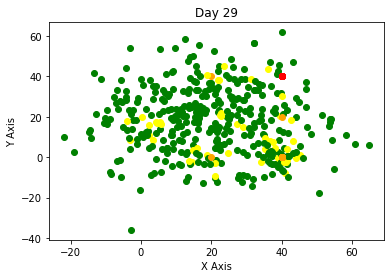

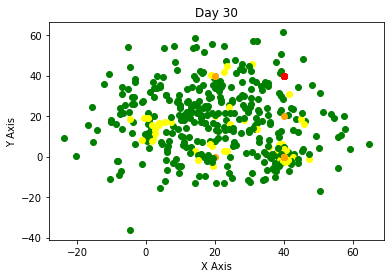

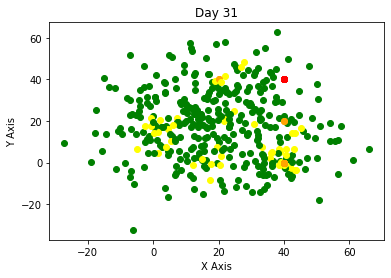

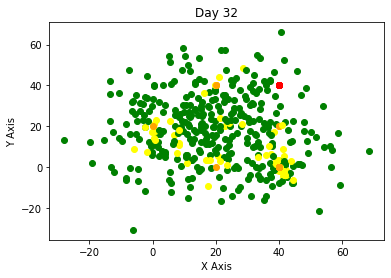

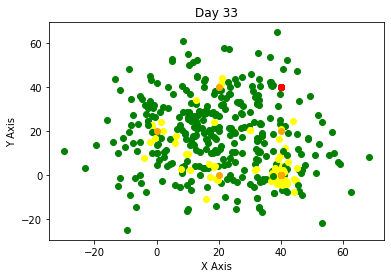

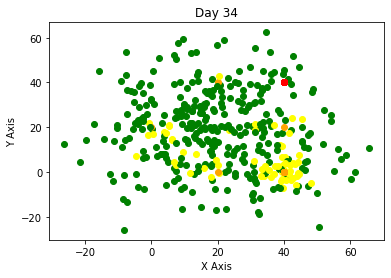

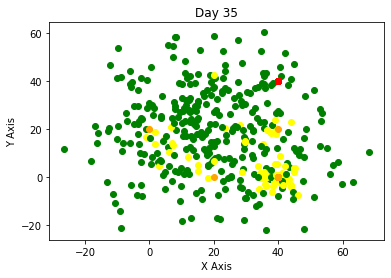

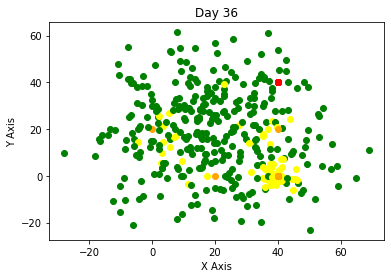

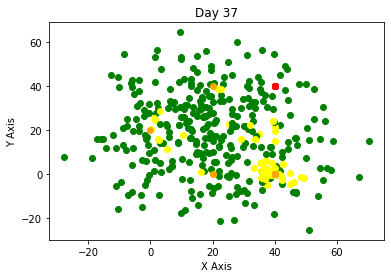

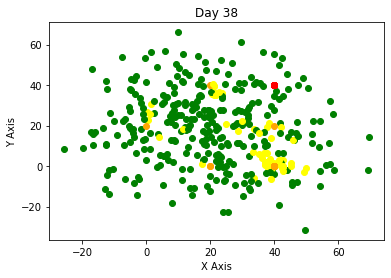

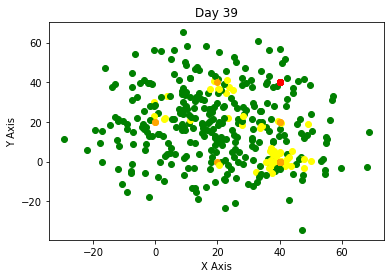

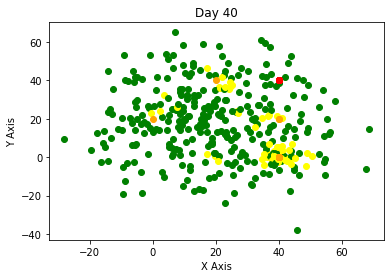

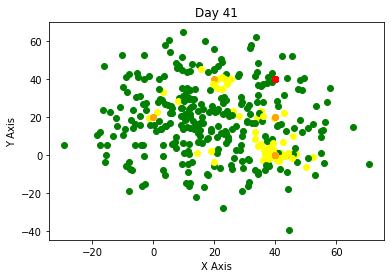

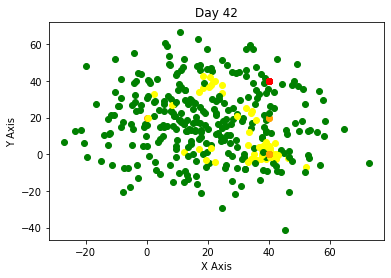

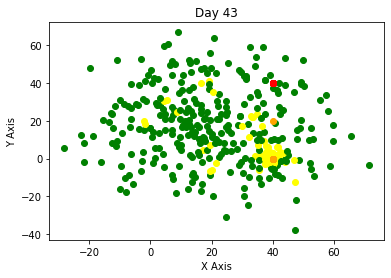

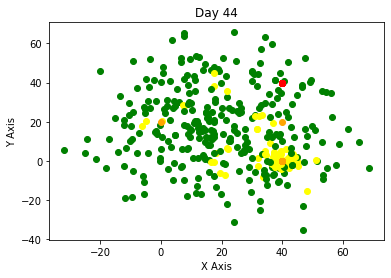

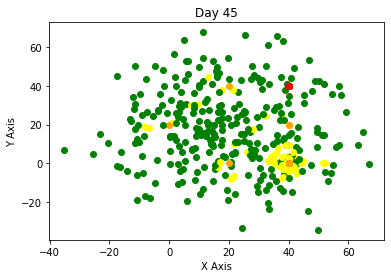

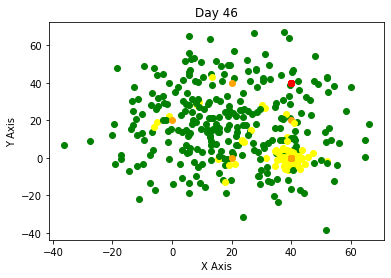

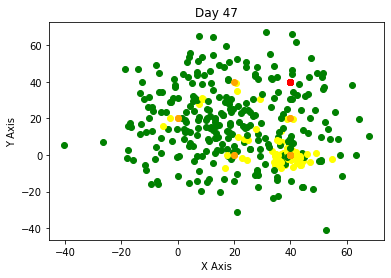

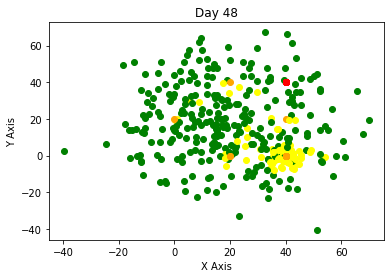

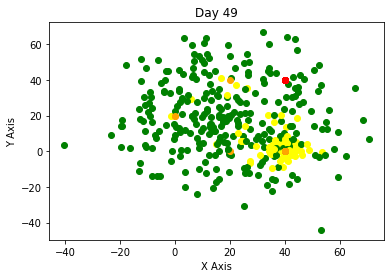

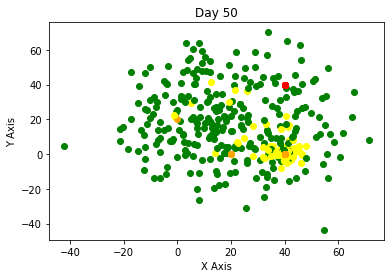

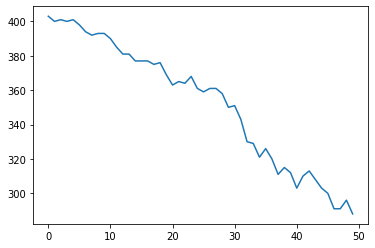

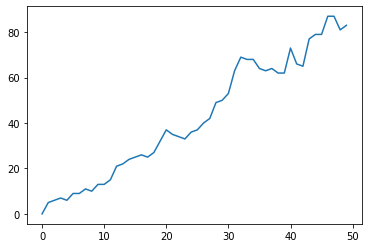

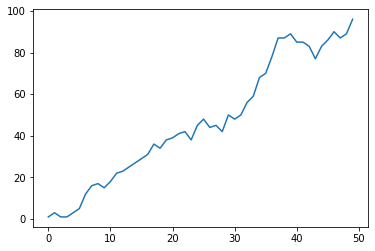

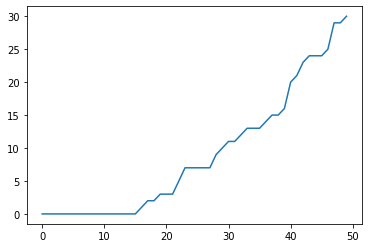

In [0]:
num_healthy2=[]
num_with_virus2=[]
num_infected2=[]
num_dead2=[]

x_coordinates=[]
y_coordinates=[]
states=[]
days_of_virus_in_body=[]
for i in range(20):
  for j in range(20):
    x_coordinates.append(2*i) #Assume that app people live at equal space from each other
    y_coordinates.append(2*j) 
    states.append(0) #Initially person is not infected, so state=0
    days_of_virus_in_body.append(0)
print(x_coordinates)
print(y_coordinates)
print(days_of_virus_in_body)
print(states)

plt.scatter(x_coordinates,y_coordinates,color='g')
plt.title('Initial state of 400 people not infected at all')
plt.show()

x_entry_points=[0,40,20,20]
y_entry_points=[20,20,0,40]
time=[]
for i in range(50):
  time.append(i)
print(time)

for i in range(50):
  arrival=np.random.uniform(0,1)
  for j in range(len(x_entry_points)):

    if(arrival<0.9): #For any second, the probability of arrival is 0.9 from any point of entry
      x_coordinates.append(x_entry_points[j])
      y_coordinates.append(y_entry_points[j])
      days_of_virus_in_body.append(0)
      infected=np.random.uniform(0,1)

      if(infected<0.4): #Probability of on outsider being sick 
        states.append(2)
      elif(infected>=0.4 and infected<0.7): #Probability of an outsider having virus 
        states.append(1)
      else:
        states.append(0)

      #Find people who can leave since they are close to entry points, distance should be less than 1 meter from enrty point, probability of leaving is 0.2
      for k in range(len(x_coordinates)):
        if(x_entry_points[j]-x_coordinates[k])**2+(y_entry_points[j]-y_coordinates[k])**2 < 1:
          leaving=np.random.uniform(0,1)
          if(leaving<0.2):
            x_coordinates.pop(k)
            y_coordinates.pop(k)
            days_of_virus_in_body.pop(k)
            states.pop(k)
            break

  for j in range(len(x_coordinates)): #Distance travelled by person in one second follows a normal distribution
    if(states[j]!=3 and states[j]!=2): #If the person is not dead, he or she will move around and an infected person will be in isolation
      x_coordinates[j]=x_coordinates[j]+np.random.normal(0,2)
      y_coordinates[j]=y_coordinates[j]+np.random.normal(0,2)

  for j in range(len(x_coordinates)): #Check all distances between people to infect healthy people who have virus or who are already infected
    for k in range(j):
      if(x_coordinates[j]-x_coordinates[k])**2+(y_coordinates[j]-y_coordinates[k])**2 < 1:
        catching=np.random.uniform(0,1)
        if(catching<0.5): #If distance is less than 1 meter, probability of catching virus is 0.5
          if((states[j]==1 or states[j]==2) and states[k]==0):
            states[k]=1 #State 1: Virus caught but not infected
          if((states[k]==1 or states[k]==2) and states[j]==0):
            states[j]=1

  for j in range(len(x_coordinates)):
    if(states[j]==1 or states[j]==2):
      days_of_virus_in_body[j]=days_of_virus_in_body[j]+1
    if(days_of_virus_in_body[j]==6):
      states[j]=2 #State 2: Infection starts
      x_coordinates[j]=40
      y_coordinates[j]=0
    if(days_of_virus_in_body[j]>=12 and states[j]==2):
      live=np.random.uniform(0,1)
      if(live<0.1):
        states[j]=3 #State 3: person is dead, death rate is 0.
        x_coordinates[j]=40
        y_coordinates[j]=40
      else:
        states[j]=0
        days_of_virus_in_body[j]=0

  healthy=0
  with_virus=0
  infected=0
  dead=0
  for j in range(len(x_coordinates)):
    if(states[j]==0):
      healthy=healthy+1
    if(states[j]==1):
      with_virus=with_virus+1
    if(states[j]==2):
      infected=infected+1
    if(states[j]==3):
      dead=dead+1

  num_healthy2.append(healthy)
  num_with_virus2.append(with_virus)
  num_infected2.append(infected)
  num_dead2.append(dead)
    
  for j in range(len(x_coordinates)):
    if(states[j]==0):
      plt.scatter(x_coordinates[j],y_coordinates[j],color='green')
    if(states[j]==1):
      plt.scatter(x_coordinates[j],y_coordinates[j],color='yellow')
    if(states[j]==2):
      plt.scatter(x_coordinates[j],y_coordinates[j],color='orange')
    if(states[j]==3):
      plt.scatter(x_coordinates[j],y_coordinates[j],color='red')
  plt.title('Day '+str(i+1))
  plt.xlabel('X Axis')
  plt.ylabel('Y Axis')
  plt.show()
  
plt.plot(time,num_healthy2)
plt.show()
plt.plot(time,num_with_virus2)
plt.show()
plt.plot(time,num_infected2)
plt.show()
plt.plot(time,num_dead2)
plt.show() 

  #Green:healthy
  #Yellow:virus caught
  #Orange:Infected
  #Red:Dead

When lockdown is implemented, no one enters and no one leaves, movement becomes less.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,

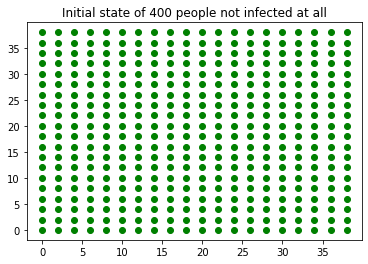

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


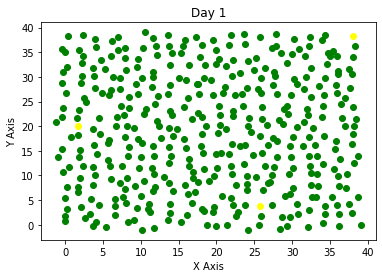

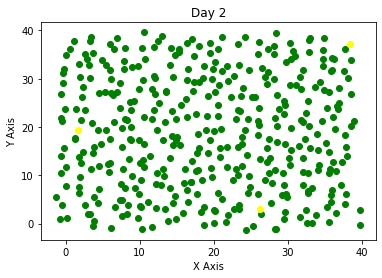

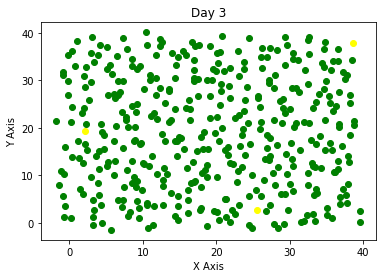

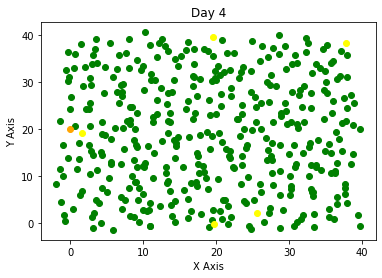

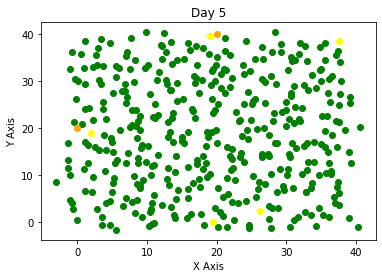

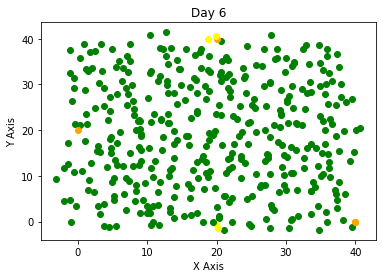

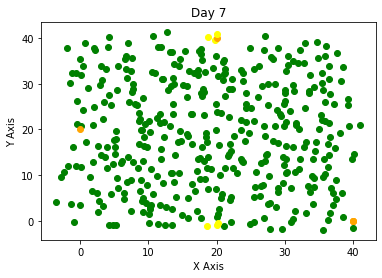

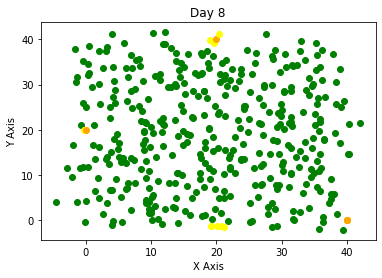

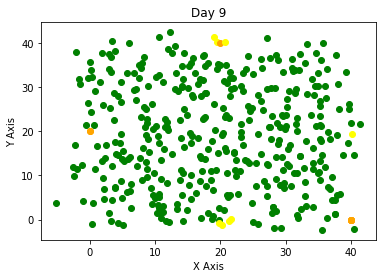

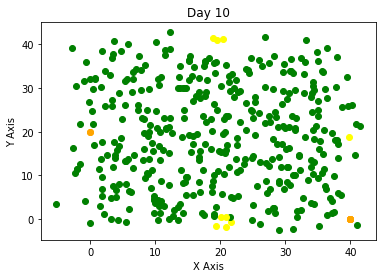

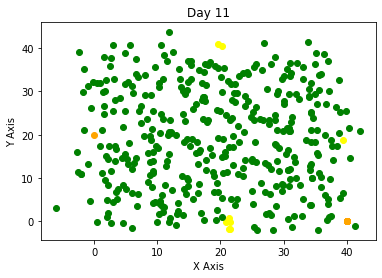

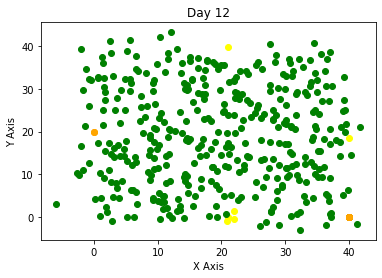

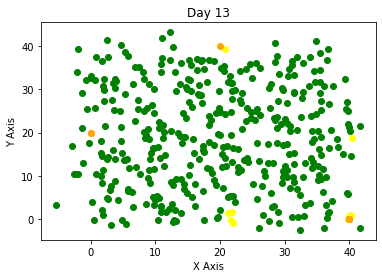

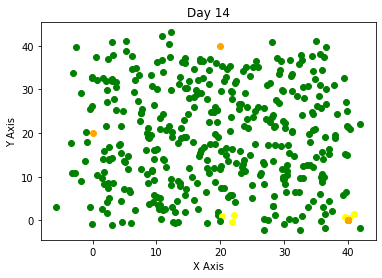

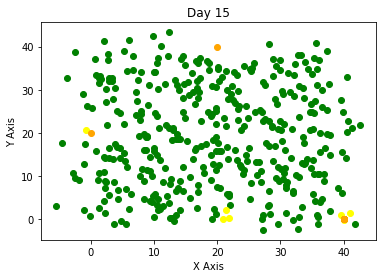

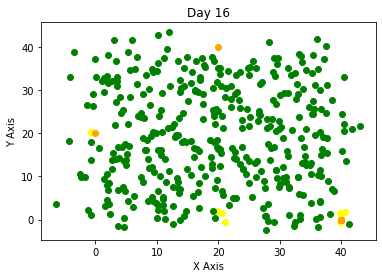

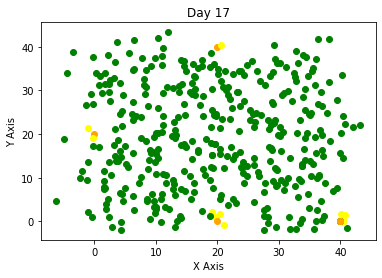

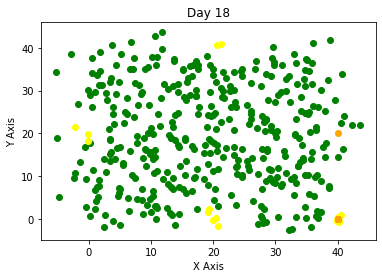

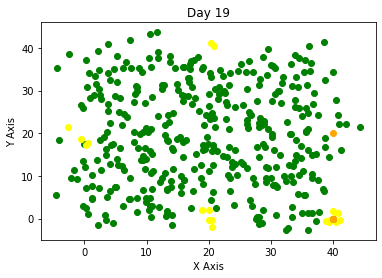

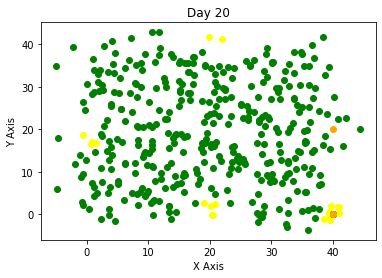

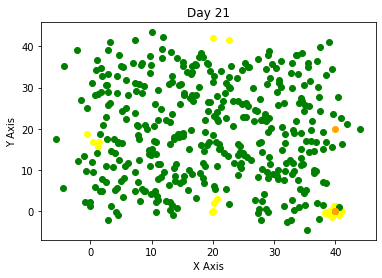

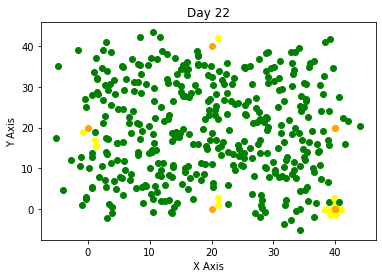

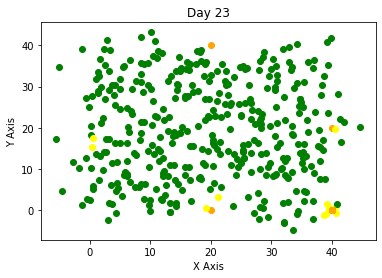

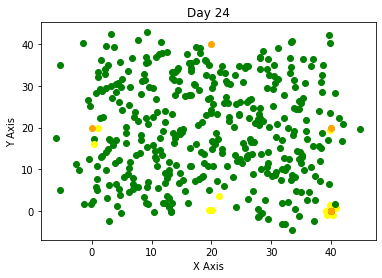

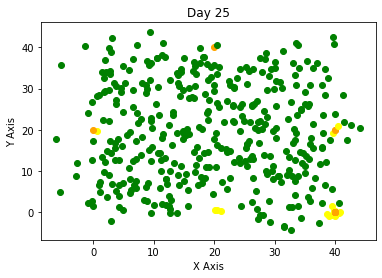

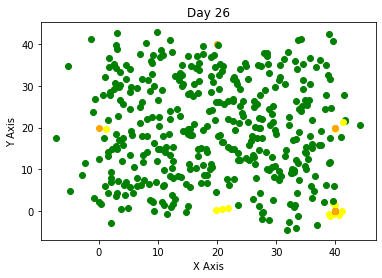

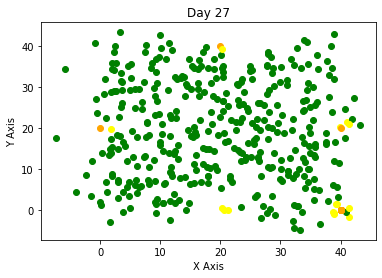

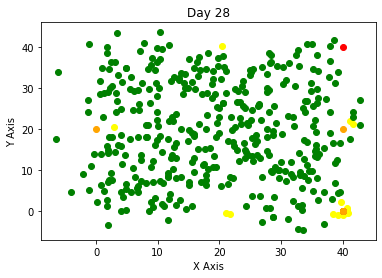

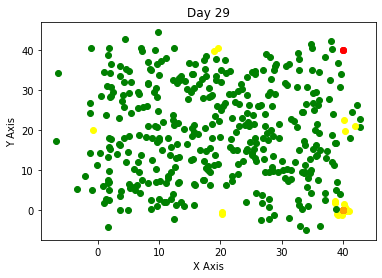

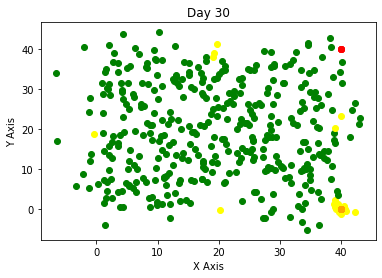

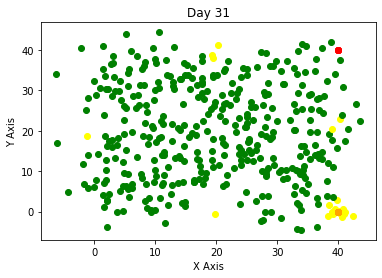

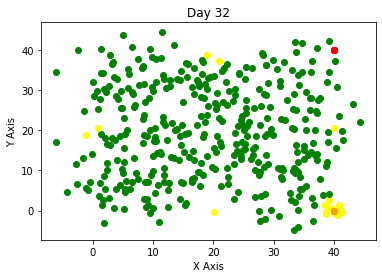

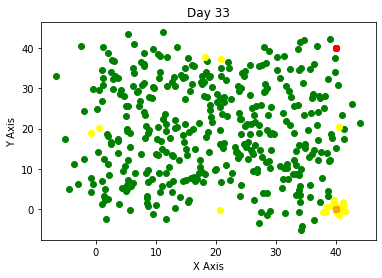

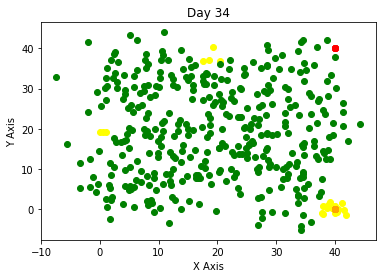

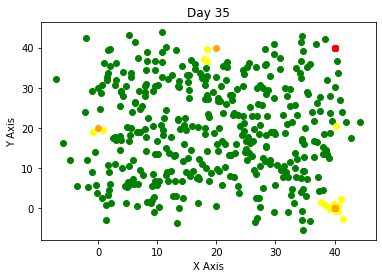

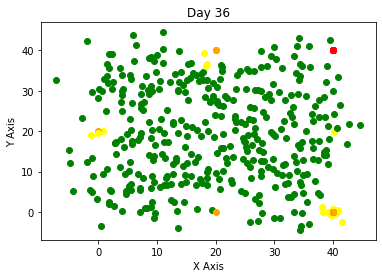

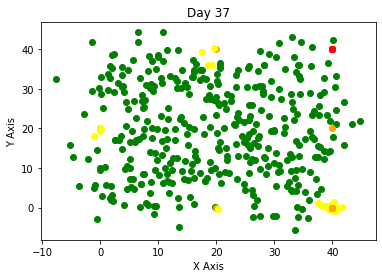

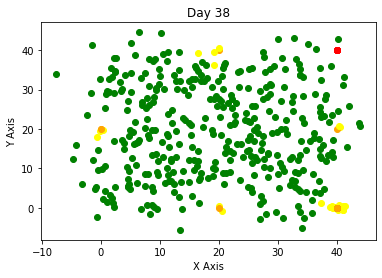

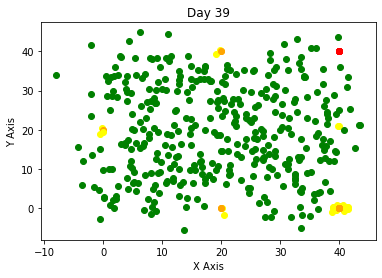

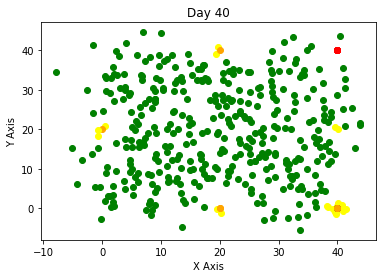

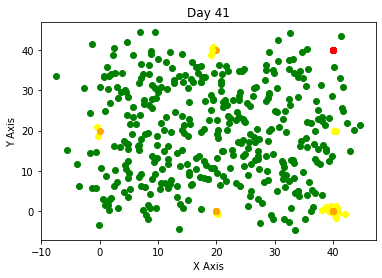

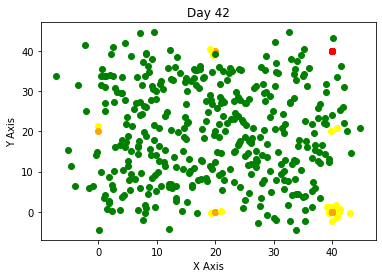

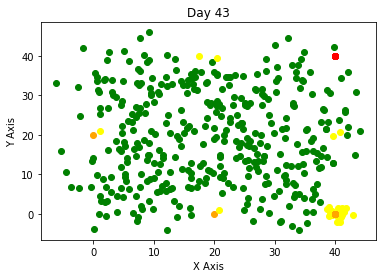

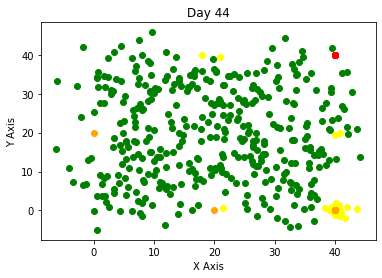

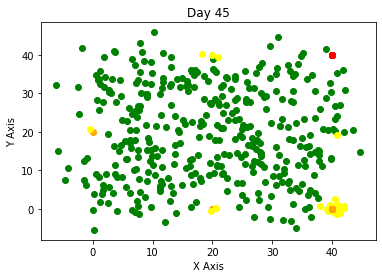

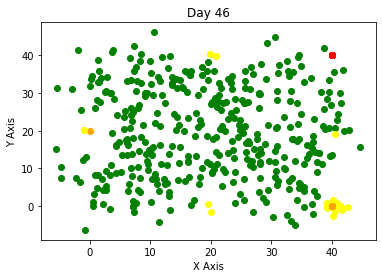

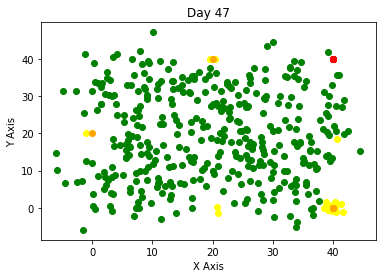

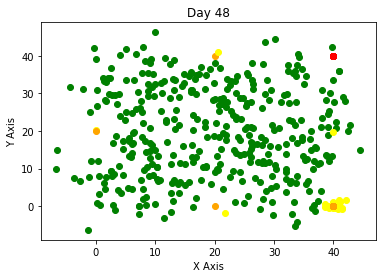

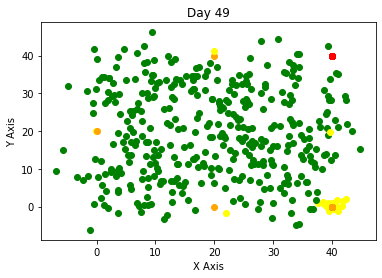

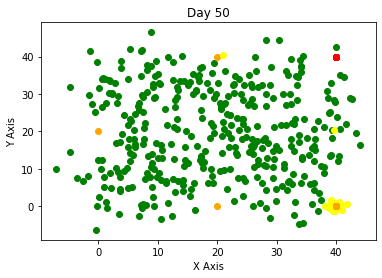

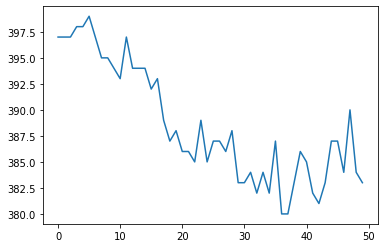

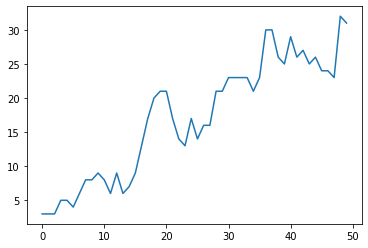

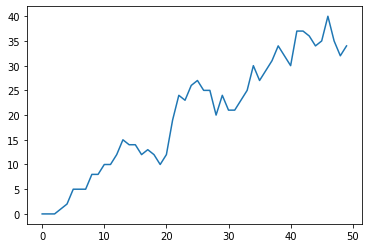

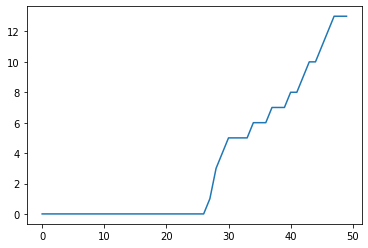

In [0]:
num_healthy3=[]
num_with_virus3=[]
num_infected3=[]
num_dead3=[]

x_coordinates=[]
y_coordinates=[]
states=[]
days_of_virus_in_body=[]
for i in range(20):
  for j in range(20):
    x_coordinates.append(2*i) #Assume that app people live at equal space from each other
    y_coordinates.append(2*j) 
    infection=np.random.uniform(0,1)
    if(infection>0.01):
      states.append(0) #Initially person is not infected, so state=0
    else:
      states.append(1)
    days_of_virus_in_body.append(0)
states[len(states)-1]=1
print(x_coordinates)
print(y_coordinates)
print(days_of_virus_in_body)
print(states)

plt.scatter(x_coordinates,y_coordinates,color='g')
plt.title('Initial state of 400 people not infected at all')
plt.show()

x_entry_points=[0,40,20,20]
y_entry_points=[20,20,0,40]
x_entry_points=[0,40,20,20]
y_entry_points=[20,20,0,40]
time=[]
for i in range(50):
  time.append(i)
print(time)

for i in range(50):
  arrival=np.random.uniform(0,1)
  arrival=np.random.uniform(0,1)
  for j in range(len(x_entry_points)):

    if(arrival<0.5): #For any second, the probability of arrival is 0.9 from any point of entry
      x_coordinates.append(x_entry_points[j])
      y_coordinates.append(y_entry_points[j])
      days_of_virus_in_body.append(0)
      infected=np.random.uniform(0,1)

      if(infected<0.4): #Probability of on outsider being sick 
        states.append(2)
      elif(infected>=0.4 and infected<0.7): #Probability of an outsider having virus 
        states.append(1)
      else:
        states.append(0)

      #Find people who can leave since they are close to entry points, distance should be less than 1 meter from enrty point, probability of leaving is 0.2
      for k in range(len(x_coordinates)):
        if(x_entry_points[j]-x_coordinates[k])**2+(y_entry_points[j]-y_coordinates[k])**2 < 1:
          leaving=np.random.uniform(0,1)
          if(leaving<0.2):
            x_coordinates.pop(k)
            y_coordinates.pop(k)
            days_of_virus_in_body.pop(k)
            states.pop(k)
            break

  for j in range(len(x_coordinates)): #Distance travelled by person in one second follows a normal distribution
    if(states[j]!=3 and states[j]!=2): #If the person is not dead, he or she will move around and an infected person will be in isolation
      x_coordinates[j]=x_coordinates[j]+np.random.normal(0,0.5)
      y_coordinates[j]=y_coordinates[j]+np.random.normal(0,0.5)

  for j in range(len(x_coordinates)): #Check all distances between people to infect healthy people who have virus or who are already infected
    for k in range(j):
      if(x_coordinates[j]-x_coordinates[k])**2+(y_coordinates[j]-y_coordinates[k])**2 < 1:
        catching=np.random.uniform(0,1)
        if(catching<0.5): #If distance is less than 1 meter, probability of catching virus is 0.5
          if((states[j]==1 or states[j]==2) and states[k]==0):
            states[k]=1 #State 1: Virus caught but not infected
          if((states[k]==1 or states[k]==2) and states[j]==0):
            states[j]=1

  for j in range(len(x_coordinates)):
    if(states[j]==1 or states[j]==2):
      days_of_virus_in_body[j]=days_of_virus_in_body[j]+1
    if(days_of_virus_in_body[j]==6):
      states[j]=2 #State 2: Infection starts
      x_coordinates[j]=40
      y_coordinates[j]=0
    if(days_of_virus_in_body[j]>=12 and states[j]==2):
      live=np.random.uniform(0,1)
      if(live<0.1):
        states[j]=3 #State 3: person is dead, death rate is 0.
        x_coordinates[j]=40
        y_coordinates[j]=40
      else:
        states[j]=0
        days_of_virus_in_body[j]=0

  healthy=0
  with_virus=0
  infected=0
  dead=0
  for j in range(len(x_coordinates)):
    if(states[j]==0):
      healthy=healthy+1
    if(states[j]==1):
      with_virus=with_virus+1
    if(states[j]==2):
      infected=infected+1
    if(states[j]==3):
      dead=dead+1

  num_healthy3.append(healthy)
  num_with_virus3.append(with_virus)
  num_infected3.append(infected)
  num_dead3.append(dead)
    
  for j in range(len(x_coordinates)):
    if(states[j]==0):
      plt.scatter(x_coordinates[j],y_coordinates[j],color='green')
    if(states[j]==1):
      plt.scatter(x_coordinates[j],y_coordinates[j],color='yellow')
    if(states[j]==2):
      plt.scatter(x_coordinates[j],y_coordinates[j],color='orange')
    if(states[j]==3):
      plt.scatter(x_coordinates[j],y_coordinates[j],color='red')
  plt.title('Day '+str(i+1))
  plt.xlabel('X Axis')
  plt.ylabel('Y Axis')
  plt.show()
  
plt.plot(time,num_healthy3)
plt.show()
plt.plot(time,num_with_virus3)
plt.show()
plt.plot(time,num_infected3)
plt.show()
plt.plot(time,num_dead3)
plt.show() 

  #Green:healthy
  #Yellow:virus caught
  #Orange:Infected
  #Red:Dead

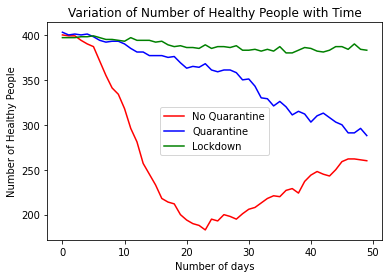

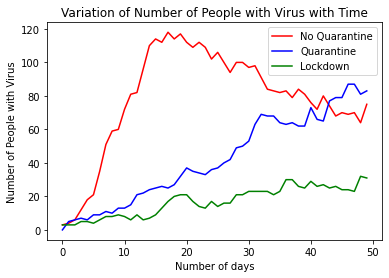

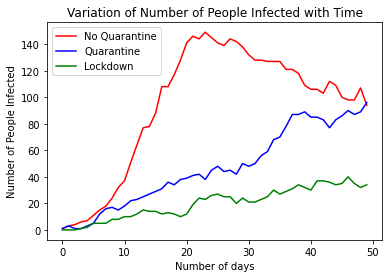

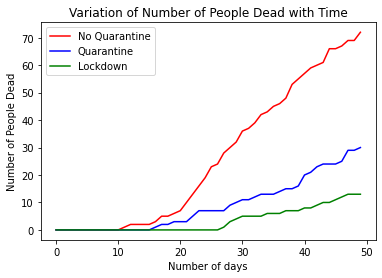

In [0]:
plt.plot(time,num_healthy,color='red',label='No Quarantine')
plt.plot(time,num_healthy2,color='blue',label='Quarantine')
plt.plot(time,num_healthy3,color='green',label='Lockdown')
plt.xlabel('Number of days')
plt.ylabel('Number of Healthy People')
plt.title('Variation of Number of Healthy People with Time')
plt.legend()
plt.show()

plt.plot(time,num_with_virus,color='red',label='No Quarantine')
plt.plot(time,num_with_virus2,color='blue',label='Quarantine')
plt.plot(time,num_with_virus3,color='green',label='Lockdown')
plt.xlabel('Number of days')
plt.ylabel('Number of People with Virus')
plt.title('Variation of Number of People with Virus with Time')
plt.legend()
plt.show()

plt.plot(time,num_infected,color='red',label='No Quarantine')
plt.plot(time,num_infected2,color='blue',label='Quarantine')
plt.plot(time,num_infected3,color='green',label='Lockdown')
plt.xlabel('Number of days')
plt.ylabel('Number of People Infected')
plt.title('Variation of Number of People Infected with Time')
plt.legend()
plt.show()

plt.plot(time,num_dead,color='red',label='No Quarantine')
plt.plot(time,num_dead2,color='blue',label='Quarantine')
plt.plot(time,num_dead3,color='green',label='Lockdown')
plt.xlabel('Number of days')
plt.ylabel('Number of People Dead')
plt.title('Variation of Number of People Dead with Time')
plt.legend()
plt.show()

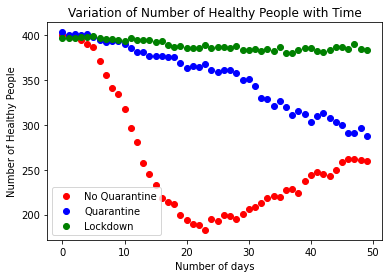

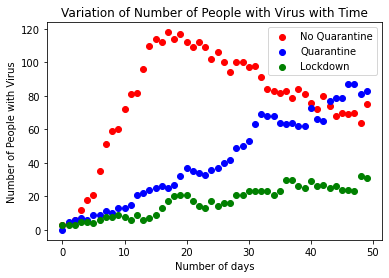

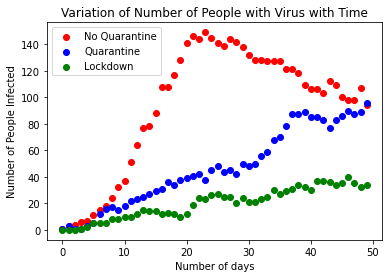

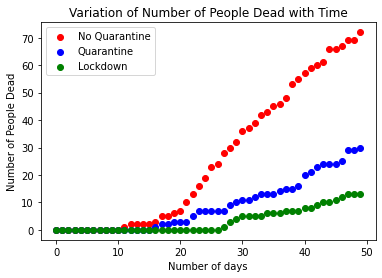

In [0]:
plt.scatter(time,num_healthy,color='red',label='No Quarantine')
plt.scatter(time,num_healthy2,color='blue',label='Quarantine')
plt.scatter(time,num_healthy3,color='green',label='Lockdown')
plt.xlabel('Number of days')
plt.ylabel('Number of Healthy People')
plt.title('Variation of Number of Healthy People with Time')
plt.legend()
plt.show()

plt.scatter(time,num_with_virus,color='red',label='No Quarantine')
plt.scatter(time,num_with_virus2,color='blue',label='Quarantine')
plt.scatter(time,num_with_virus3,color='green',label='Lockdown')
plt.xlabel('Number of days')
plt.ylabel('Number of People with Virus')
plt.title('Variation of Number of People with Virus with Time')
plt.legend()
plt.show()

plt.scatter(time,num_infected,color='red',label='No Quarantine')
plt.scatter(time,num_infected2,color='blue',label='Quarantine')
plt.scatter(time,num_infected3,color='green',label='Lockdown')
plt.xlabel('Number of days')
plt.ylabel('Number of People Infected')
plt.title('Variation of Number of People with Virus with Time')
plt.legend()
plt.show()

plt.scatter(time,num_dead,color='red',label='No Quarantine')
plt.scatter(time,num_dead2,color='blue',label='Quarantine')
plt.scatter(time,num_dead3,color='green',label='Lockdown')
plt.xlabel('Number of days')
plt.ylabel('Number of People Dead')
plt.title('Variation of Number of People Dead with Time')
plt.legend()
plt.show()